In [1]:
import os
import warnings

import matplotlib
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import model
import numpy as np
import torch
from data import colorDict, onehot2rgb, rgb2onehot
from PIL import Image

warnings.filterwarnings(action="ignore")

test


In [2]:
data_root = r"/mnt/d/data/"
file = "2264361042176740212350446593470409721797664.270r..png"
weight_file = './experiment/vgg16_largefov/vgg16_large_fov_best.pt'

image_dir = os.path.join(data_root,"Images", file)
mask_dir = os.path.join(data_root,"Labels", file)
use_gpu = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

num_classes = len(colorDict.keys())

iter_max = 10
bi_w = 7
bi_xy_std = 50
bi_rgb_std = 4
pos_w = 3
pos_xy_std = 3

cpu


In [3]:
DeepLab_v1 = model.DeepLab_v1(num_classes=num_classes, use_gpu=use_gpu, device=device, weight_file=weight_file)
predict = DeepLab_v1.inference(image_dir=image_dir, iter_max=iter_max, 
                               bi_w=bi_w, bi_xy_std=bi_xy_std, bi_rgb_std=bi_rgb_std, 
                               pos_w=pos_w, pos_xy_std=pos_xy_std)
predict = onehot2rgb(predict, colorDict)

In [4]:
def show_im_mask(image_dir:str, mask_dir:str, predict:np._typing.NDArray) -> None:
    image = matplotlib.image.imread(image_dir)
    mask = Image.open(mask_dir)

    cmap = colors.ListedColormap(np.array(list(colorDict.values()))/255)
    plt.figure(figsize=(25, 8))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05],  wspace=0.1)

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    cax = plt.subplot(gs[3])

    ax1.imshow(image)
    mask = ax2.imshow(mask, cmap=cmap)
    ax3.imshow(predict)

    cbar = plt.colorbar(mask, cax=cax)
    tick_locs = (np.arange(len(colorDict)) + 0.5) / len(colorDict)*255

    # Set the ticks and labels for the colorbar with a specific font size
    cbar.set_ticks(tick_locs)
    cbar.ax.set_yticklabels(list(colorDict.keys()), fontsize=22)  # Adjust fontsize as needed

    # Title of each axis in the plot
    title_size = 26
    ax1.set_title('Original Image', fontsize=title_size)
    ax2.set_title('Ground Truth Mask', fontsize=title_size)
    ax3.set_title('Predicted Mask', fontsize=title_size)
    plt.show()

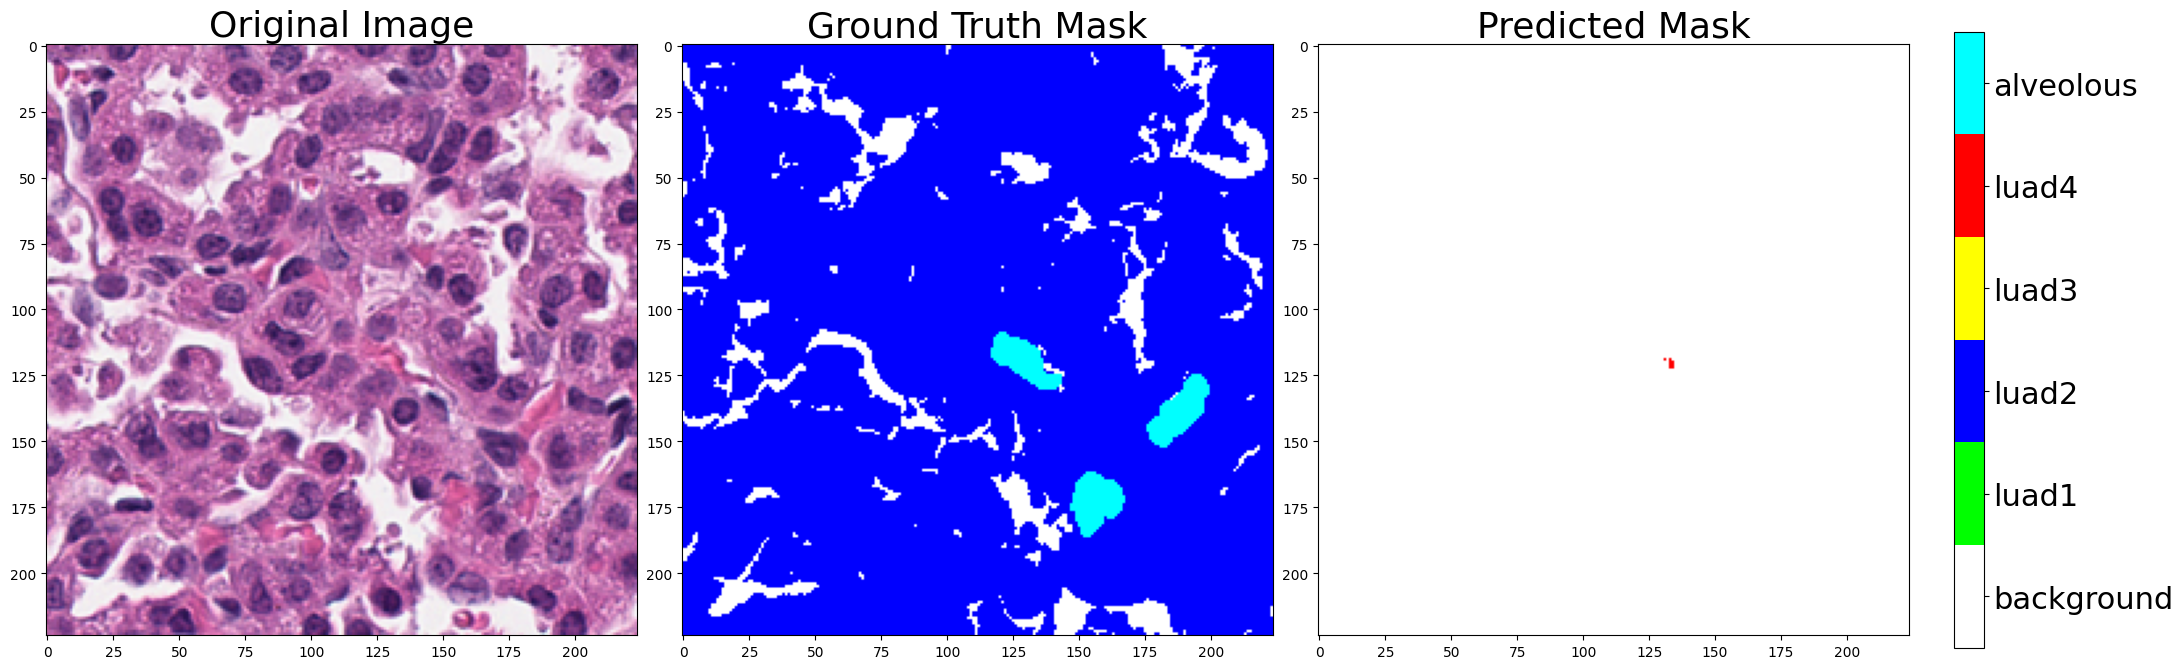

In [5]:
show_im_mask(image_dir, mask_dir, predict)